Copyright 2017 Google Inc.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.


# dSprites - Disentanglement testing Sprites dataset

## Description
Procedurally generated 2D shapes dataset. This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite (color isn't varying here, its value is fixed).

All possible combinations of the latents are present.

The ordering of images in the dataset (i.e. shape[0] in all ndarrays) is fixed and meaningful, see below.

We chose the smallest changes in latent values that generated different pixel outputs at our 64x64 resolution after rasterization.

No noise added, single image sample for a given latent setting.

## Details about the ordering of the dataset

The dataset was generated procedurally, and its order is deterministic.
For example, the image at index 0 corresponds to the latents (0, 0, 0, 0, 0, 0).

Then the image at index 1 increases the least significant "bit" of the latent:
(0, 0, 0, 0, 0, 1)

And similarly, till we reach index 32, where we get (0, 0, 0, 0, 1, 0). 

Hence the dataset is sequentially addressable using variable bases for every "bit".
Using dataset['metadata']['latents_sizes'] makes this conversion trivial, see below.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# from https://matplotlib.org/3.1.1/tutorials/text/usetex.html
import matplotlib
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Change figure aesthetics
%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})


In [2]:
# Load dataset
dataset_zip = np.load('dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', mmap_mode='r', allow_pickle=True, encoding='bytes')


In [3]:

print('Keys in the dataset:', [k for k in dataset_zip.files])
imgs = dataset_zip['imgs']
latents_values = dataset_zip['latents_values']
latents_classes = dataset_zip['latents_classes']
metadata = dataset_zip['metadata'][()]

print('Metadata: \n', metadata)


Keys in the dataset: ['metadata', 'imgs', 'latents_classes', 'latents_values']
Metadata: 
 {b'title': b'dSprites dataset', b'latents_names': (b'color', b'shape', b'scale', b'orientation', b'posX', b'posY'), b'date': b'April 2017', b'author': b'lmatthey@google.com', b'description': b'Disentanglement test Sprites dataset.Procedurally generated 2D shapes, from 6 disentangled latent factors.This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite. All possible variations of the latents are present. Ordering along dimension 1 is fixed and can be mapped back to the exact latent values that generated that image.We made sure that the pixel outputs are different. No noise added.', b'latents_possible_values': {b'shape': array([1., 2., 3.]), b'orientation': array([0.        , 0.16110732, 0.32221463, 0.48332195, 0.64442926,
       0.80553658, 0.96664389, 1.12775121, 1.28885852, 1.44996584,
       1.61107316, 1.77218047, 1.93328779, 2.0943951 , 2.25550242,

In [4]:
# Define number of values per latents and functions to convert to indices
latents_sizes = metadata[b'latents_sizes']
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:],
                                np.array([1,])))

def latent_to_index(latents):
  return np.dot(latents, latents_bases).astype(int)


def sample_latent(size=1):
  samples = np.zeros((size, latents_sizes.size))
  for lat_i, lat_size in enumerate(latents_sizes):
    samples[:, lat_i] = np.random.randint(lat_size, size=size)

  return samples


In [5]:
# Helper function to show images
def show_images_grid(imgs_, num_images=25):
  ncols = int(np.ceil(num_images**0.5))
  nrows = int(np.ceil(num_images / ncols))
  _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
  axes = axes.flatten()

  for ax_i, ax in enumerate(axes):
    if ax_i < num_images:
      ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      ax.axis('off')

def show_density(imgs):
  _, ax = plt.subplots()
  ax.imshow(imgs.mean(axis=0), interpolation='nearest', cmap='Greys_r')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

latents possible values: 
 [b'shape', b'orientation', b'color', b'posX', b'scale', b'posY']


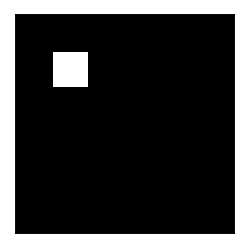

In [6]:

# show latents
print('latents possible values: \n', list(metadata[b'latents_possible_values'].keys()))
# Sample latents randomly
#latents_sampled = sample_latent(size=1)

def get_sample(color, shape, scale, orientation, posX, posY):
    #posX = [0 .. 31]
    #shape = [0 .. 2]
    #posY = [0 .. 31]
    #orientation = [0 .. 38]
    #scale = [0 .. 5]
    #color = 0
    return [[color, shape, scale, orientation, posX, posY]]

def get_image(color, shape, scale, orientation, posX, posY):
    latents_sampled = get_sample(color, shape, scale, orientation, posX, posY)
    img_sampled = imgs[latent_to_index(latents_sampled)][0]
    return img_sampled

latents_sampled = get_sample(0, 0, 0, 0, 0, 0)

# Select images
indices_sampled = latent_to_index(latents_sampled)
imgs_sampled = imgs[indices_sampled]

# Show images
_, ax = plt.subplots()
ax.imshow(imgs_sampled[0], interpolation='nearest', cmap='Greys_r')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

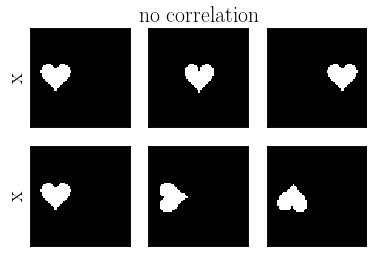

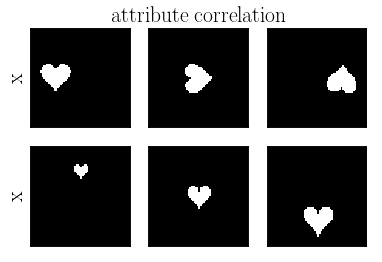

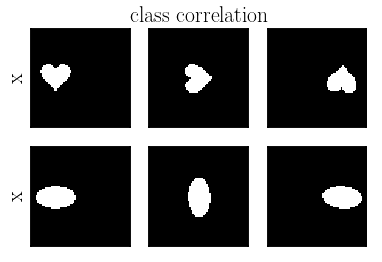

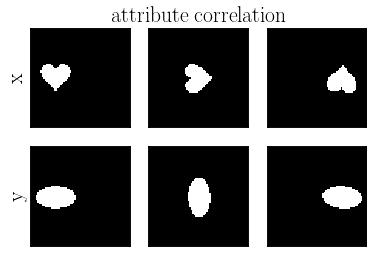

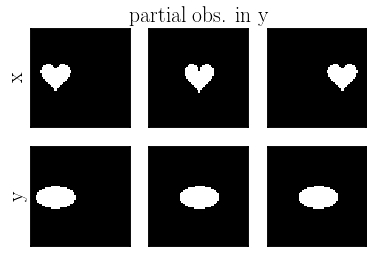

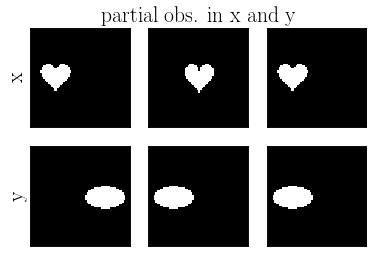

In [13]:
def plot_img_list_13(img_list, title):
    # Show images
    _, axs = plt.subplots(1,3)
    for img, ax in zip(img_list, axs):
        ax.imshow(img, interpolation='nearest', cmap='Greys_r')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    axs[1].set_title(title)
    plt.show()
    
def plot_img_list_23(img_list, title, x = "", y = ""):
    # Show images
    _, axs = plt.subplots(2,3)
    for img, ax in zip(img_list, axs.flatten()):
        ax.imshow(img, interpolation='nearest', cmap='Greys_r')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    axs[0][1].set_title(title)
    axs[0][0].set_ylabel(x)
    axs[1][0].set_ylabel(y)
    plt.show()

img_list = []
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=31, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=0, posY=16))
plot_img_list_23(img_list, 'no correlation', 'x', 'x')

img_list = []
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=31, posY=16))
img_list.append(get_image(color=0, shape=2, scale=0, orientation=0, posX=16, posY=0))
img_list.append(get_image(color=0, shape=2, scale=3, orientation=0, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=31))
plot_img_list_23(img_list, 'attribute correlation', 'x', 'x')


img_list = []
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=31, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=10, posX=16, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=19, posX=31, posY=16))
plot_img_list_23(img_list, "class correlation", 'x', 'x')


img_list = []
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=31, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=10, posX=16, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=19, posX=31, posY=16))
plot_img_list_23(img_list, "attribute correlation", "x", "y")


#img_list = []
#img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
#img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=16))
#img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=31, posY=16))
#img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=0))
#img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=8))
#img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=31, posY=31))
#plot_img_list_23(img_list, "non-lin. attribute correlation", "x", "y")

img_list = []
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=31, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=16))
plot_img_list_23(img_list, "partial obs. in y", "x", "y")

img_list = []
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=31, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
plot_img_list_23(img_list, "partial obs. in x and y", "x", "y")

In [8]:
def plot_images():
    img_list = []
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=31, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=0, posY=16))
    plot_img_list_y6(img_list, 'no correlation', y=0)

    img_list = []
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=31, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=0, orientation=0, posX=16, posY=0))
    img_list.append(get_image(color=0, shape=2, scale=3, orientation=0, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=31))
    plot_img_list_y6(img_list, 'attribute correlation', y=2)

    img_list = []
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=31, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=10, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=19, posX=31, posY=16))
    plot_img_list_y6(img_list, "class correlation", y=4)


    ############################################################

    img_list = []
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=31, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=31))
    img_list.append(get_image(color=0, shape=2, scale=3, orientation=0, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=0, orientation=0, posX=31, posY=0))
    plot_img_list_y6(img_list, "attribute correlation", y=6, ylabel="a")

    img_list = []
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=10, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=19, posX=31, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=0))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=31))
    plot_img_list_y6(img_list, "", y=7 , ylabel="b")

    ############################################################

    img_list = []
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=31, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=0, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=3, orientation=0, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=31, posY=16))
    plot_img_list_y6(img_list, "partial obs. in b", y=9, ylabel="a")

    img_list = []
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=31))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=31))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=16, posY=0))
    plot_img_list_y6(img_list, "", y=10, ylabel="b")

    ############################################################

    img_list = []
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=0, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=16))
    img_list.append(get_image(color=0, shape=2, scale=0, orientation=0, posX=31, posY=16))
    plot_img_list_y6(img_list, "partial obs. in a and b", y=12, ylabel="a")

    img_list = []
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=31, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=31, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
    img_list.append(get_image(color=0, shape=1, scale=5, orientation=0, posX=0, posY=16))
    plot_img_list_y6(img_list, "", y=13, ylabel="b")



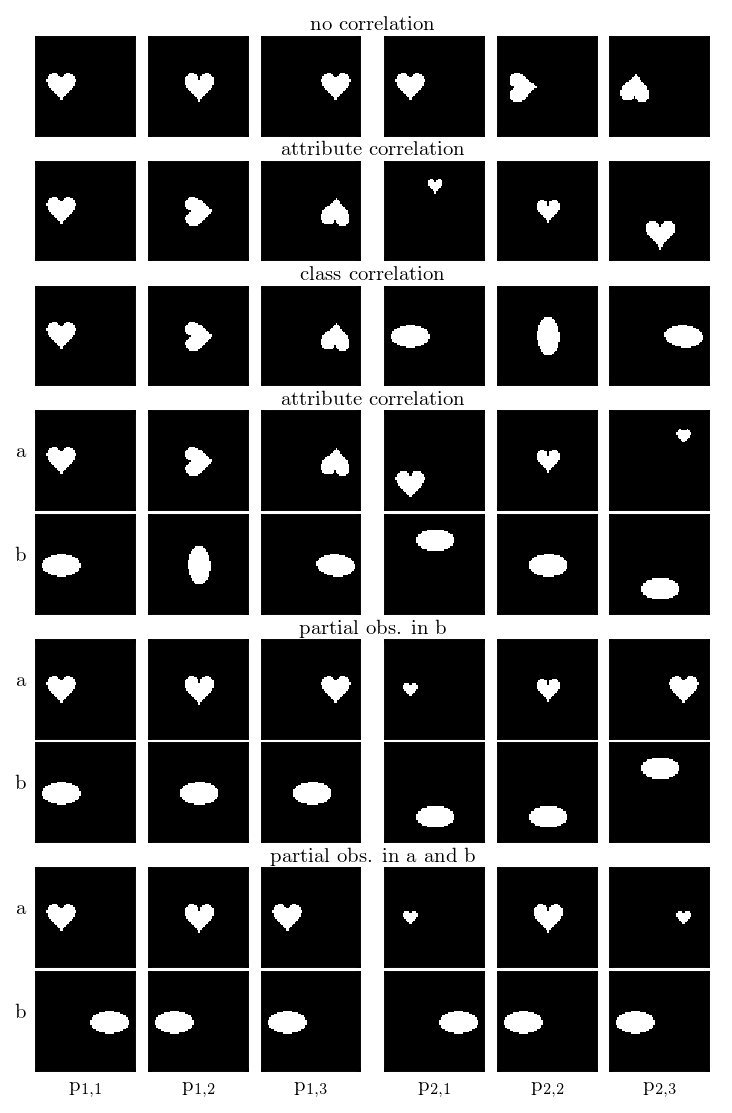

In [19]:
factor = 1.5

paper_width_cm = 15
paper_width_inch = paper_width_cm / 2.54
dpi = 150
fig_w = paper_width_inch         # 7 images
fig_h = paper_width_inch * 9 / 7 * 1.2 # 9 images


widths = [1, 1, 1, 0.1, 1, 1, 1]
sep = .15
heights = [1, sep, 1, sep, 1, sep, 1, 1, sep, 1, 1, sep, 1, 1]
gs_kw = dict(width_ratios=widths, height_ratios=heights, wspace=0., hspace=.1)

_, axs = plt.subplots(14,7,figsize=(fig_w,fig_h), dpi=dpi, sharey=True, sharex=True,  gridspec_kw = gs_kw)
def plot_img_list_y6(img_list, title, y = 0, ylabel = ""):
    # Show images
    for img, ax in zip(img_list[:3], axs[y][:3]):
        ax.imshow(img, interpolation='nearest', cmap='Greys_r', aspect="equal")
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    for img, ax in zip(img_list[3:], axs[y][4:]):
        ax.imshow(img, interpolation='nearest', cmap='Greys_r', aspect="equal")
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    # Set the title and y label
    ax = axs[y][3]
    ax.set_aspect('auto')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    ax.set_title(title, fontsize=10, pad=3.5, fontfamily='serif')
    h = axs[y][0].set_ylabel(ylabel, fontsize=10, fontfamily='serif', labelpad=8)
    h.set_rotation(0)

# Remove the lines of the seperators
for y in [1, 3, 5, 8, 11]:
    for x in range(7):
        ax = axs[y][x]
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')

# Write the xlabel for the parameters 
axs[-1][0].set_xlabel("p$_{1,1}$", fontsize=10)
axs[-1][1].set_xlabel("p$_{1,2}$", fontsize=10)
axs[-1][2].set_xlabel("p$_{1,3}$", fontsize=10)
axs[-1][4].set_xlabel("p$_{2,1}$", fontsize=10)
axs[-1][5].set_xlabel("p$_{2,2}$", fontsize=10)
axs[-1][6].set_xlabel("p$_{2,3}$", fontsize=10)
plot_images()
# second exampleis wrt. to the scale of the heart.
# The position of the heart is non-ambigues


#plt.tight_layout()
plt.savefig("/opt/repositories/dsprites-dataset/dsprites.pdf", dpi='figure', transparent=True, papertype='a4', bbox_inches='tight')
plt.show()


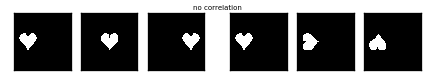

In [82]:

from mpl_toolkits.axes_grid1 import Divider, Size
from mpl_toolkits.axes_grid1.mpl_axes import Axes


widths = [1, 1, 1, 0.1, 1, 1, 1]
heights = [1]
gs_kw = dict(width_ratios=widths, height_ratios=heights)

factor = 1.5
#fig3 = plt.figure(constrained_layout=True, figsize=(factor * 7,factor * 1), dpi=50)
f, axs = plt.subplots(1,7,figsize=(factor * 7,factor * 1), dpi=50, sharey=True, sharex=True,  gridspec_kw = gs_kw)
def plot_img_list_y6(img_list, title, y = 0, ylabel = ""):
    # Show images
    for img, ax in zip(img_list[:3], axs[:3]):
        ax.imshow(img, interpolation='nearest', cmap='Greys_r', aspect="equal")
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.axis('off')
    for img, ax in zip(img_list[3:], axs[4:]):
        ax.imshow(img, interpolation='nearest', cmap='Greys_r', aspect="equal")
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.axis('off')
    ax = axs[3]
    #ax.imshow(0 * np.ones((64,64,3), dtype=np.int8), interpolation='nearest', aspect=10.1)
    #ax.plot([0, 1, 2])
    
    #ax.set_aspect('auto', 'datalim')
    ax.set_aspect('auto')
    
    #h = [Size.Fixed(10.0), Size.Fixed(1.0)]
    #v = [Size.Fixed(10.0), Size.Fixed(1.0)]
    #divider = Divider(ax, (0.0, 0.0, 1., 1.), h, v, aspect=True)
    #ax = Axes(f, divider.get_position())
    #ax.set_axes_locator(divider.new_locator(nx=1, ny=1))
    #ax.set_xlim([-2,2])
    #ax.bbox
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    #ax.axvline()
    #ax.set_aspect('equal')
    ax.set_title(title, fontsize=10)
    axs[0].set_ylabel(ylabel, fontsize=10)

img_list = []
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=31, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=0, posY=16))
plot_img_list_y6(img_list, 'no correlation', y=0)

#plt.tight_layout()
#plt.savefig("test2.svg", dpi='figure', transparent=True, papertype='a4')
plt.show()


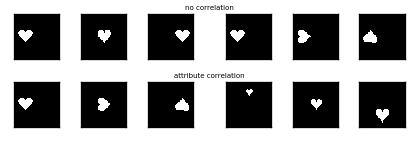

In [103]:
factor = 1.5

widths = [1, 1, 1, 0.1, 1, 1, 1]
heights = [1, 1]
gs_kw = dict(width_ratios=widths, height_ratios=heights, wspace=0.1, hspace=0.5)

_, axs = plt.subplots(2,7,figsize=(factor * 7,factor * 2), dpi=50, sharey=True, sharex=True,
                      gridspec_kw = gs_kw)
def plot_img_list_y6(img_list, title, y = 0, ylabel = ""):
    # Show images
    for img, ax in zip(img_list[:3], axs[y][:3]):
        ax.imshow(img, interpolation='nearest', cmap='Greys_r', aspect="equal")
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.axis('off')
    for img, ax in zip(img_list[3:], axs[y][4:]):
        ax.imshow(img, interpolation='nearest', cmap='Greys_r', aspect="equal")
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.axis('off')
    ax = axs[y][3]
    #ax.imshow(255 * np.ones((64,64,3), dtype=np.int8), interpolation='nearest', aspect="equal")
    ax.set_aspect('auto')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    #ax.set_aspect('equal')
    ax.set_title(title, fontsize=10)
    axs[y][0].set_ylabel(ylabel, fontsize=10)

img_list = []
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=31, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=0, posY=16))
plot_img_list_y6(img_list, 'no correlation', y=0)

img_list = []
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=10, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=19, posX=31, posY=16))
img_list.append(get_image(color=0, shape=2, scale=0, orientation=0, posX=16, posY=0))
img_list.append(get_image(color=0, shape=2, scale=3, orientation=0, posX=16, posY=16))
img_list.append(get_image(color=0, shape=2, scale=5, orientation=0, posX=16, posY=31))
plot_img_list_y6(img_list, 'attribute correlation', y=1)


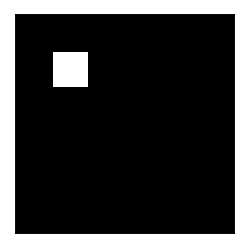

In [233]:
# Compute the density of the data to show that no pixel ever goes out of
# the boundary. Obviously it also means that the main support of the pixels is in the center
# half. 
# Locations cover a square, which make the aligned X-Y latents more likely for
# models to discover.

show_density(imgs_sampled)

## Conditional sampling of the dataset

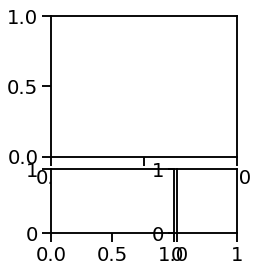

In [118]:
fig9 = plt.figure(constrained_layout=False)
gs1 = fig9.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.48,
                        wspace=0.05)
f9_ax1 = fig9.add_subplot(gs1[:-1, :])
f9_ax2 = fig9.add_subplot(gs1[-1, :-1])
f9_ax3 = fig9.add_subplot(gs1[-1, -1])

#gs2 = fig9.add_gridspec(nrows=3, ncols=3, left=0.55, right=0.98,
#                        hspace=0.05)
#f9_ax4 = fig9.add_subplot(gs2[:, :-1])
#f9_ax5 = fig9.add_subplot(gs2[:-1, -1])
#f9_ax6 = fig9.add_subplot(gs2[-1, -1])

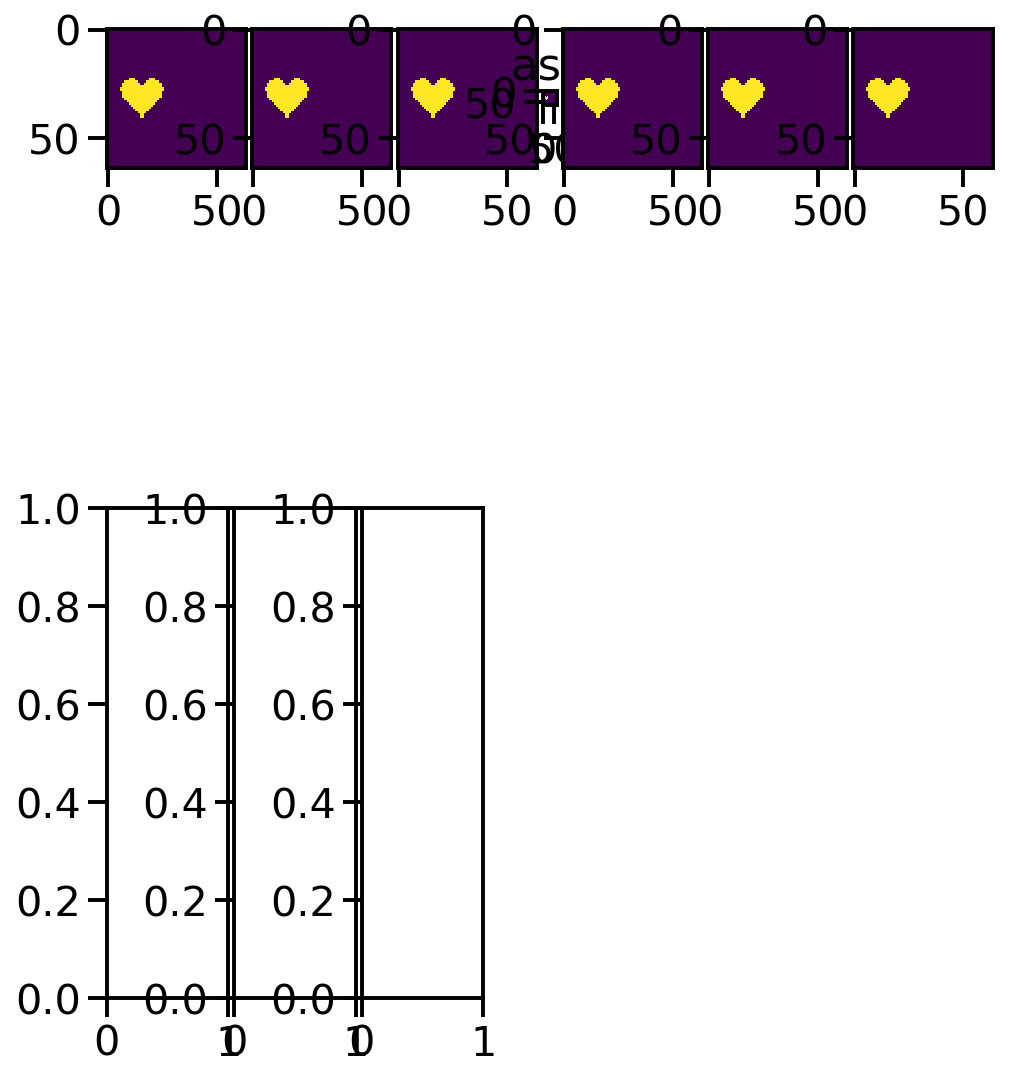

In [142]:
factor = 1.5

im_hight = 
sep_1 = 

paper_width_cm = 15
paper_width_inch = paper_width_cm / 2.54
dpi = 150
fig_w = paper_width_inch         # 7 images
fig_h = paper_width_inch * 9 / 7 # 9 images


#widths = [1, 1, 1, 0.1, 1, 1, 1]
#heights = [1, 1, 1, 1, 1, 1, 1, 1, 1]
#gs_kw = dict(width_ratios=widths, height_ratios=heights, wspace=1.5, hspace=0.1)

#_, axs = plt.subplots(9,7,figsize=(fig_w,fig_h), dpi=dpi, sharey=True, sharex=True,  gridspec_kw = gs_kw)

#width_ratios = [1, 1, 1, 0.1, 1, 1, 1] / np.sum([1, 1, 1, 0.1, 1, 1, 1])
#print(width_ratios)
width_ratios = [1, 1, 1, 0.1, 1, 1, 1] 
img = get_image(color=0, shape=2, scale=5, orientation=0, posX=0, posY=16)
fig9 = plt.figure(constrained_layout=False, figsize=(fig_w,fig_h), dpi=dpi)
gs1 = fig9.add_gridspec(nrows=1, ncols=7, left=0.0, right=1., bottom=.70, top=.98,
                        wspace=0.05, width_ratios = width_ratios)
ax = fig9.add_subplot(gs1[0, 0])
ax.imshow(img)
ax = fig9.add_subplot(gs1[0, 1])
ax.imshow(img)
ax = fig9.add_subplot(gs1[0, 2])
ax.imshow(img)
ax = fig9.add_subplot(gs1[0, 3])
ax.imshow(img)
#ax.imshow(img)
ax.set_title("asd")
ax = fig9.add_subplot(gs1[0, 4])
ax.imshow(img)
ax = fig9.add_subplot(gs1[0, 5])
ax.imshow(img)
ax = fig9.add_subplot(gs1[0, 6])
ax.imshow(img)

gs1 = fig9.add_gridspec(nrows=1, ncols=7, left=0.0, right=1., bottom=0.05, top=0.48,
                        wspace=0.05)
f9_ax1 = fig9.add_subplot(gs1[0, 0])
f9_ax2 = fig9.add_subplot(gs1[0, 1])
f9_ax3 = fig9.add_subplot(gs1[0, 2])

#gs2 = fig9.add_gridspec(nrows=3, ncols=3, left=0.55, right=0.98,
#                        hspace=0.05)
#f9_ax4 = fig9.add_subplot(gs2[:, :-1])
#f9_ax5 = fig9.add_subplot(gs2[:-1, -1])
#f9_ax6 = fig9.add_subplot(gs2[-1, -1])